In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [17]:
kc_houses = pd.read_csv('kc_house_data.csv')

In [18]:
kc_houses = kc_houses.drop('id' , 1)

In [19]:
kc_houses.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [20]:
kc_houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
def getPolynomial(data, degree=1):
    if degree ==1:
        return data
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree= degree)
    poly_features = poly.fit_transform(data)
    return poly_features

In [22]:
training_data = kc_houses.iloc[:, [3,4,10 , 12 , 16]].values
goal_data = kc_houses.iloc[:, 1].values

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(training_data, goal_data, test_size=0.2, random_state = 0)

In [24]:
degree = 3

In [25]:
model = LinearRegression()

model.fit(getPolynomial(X_train , degree),Y_train)

Y_predict = model.predict(getPolynomial(X_test,degree))

model.score(getPolynomial(X_test,degree) , Y_test)

0.7019087797711407

In [26]:
def plot(feature = [], actual = [], predicted = [], alpha = 1):
    plt.plot(feature, actual, '.', predicted, '-')
    plt.title('alpha = {}'.format(alpha))
    plt.show()

In [29]:
features = X_train
poly_features = getPolynomial(features, 5)
m_scores = []
coeff_matrix = []

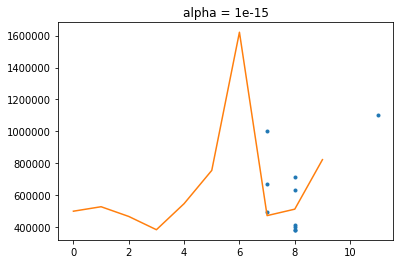

------------------


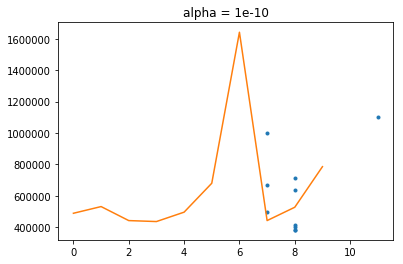

------------------


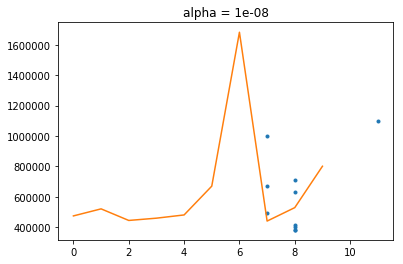

------------------


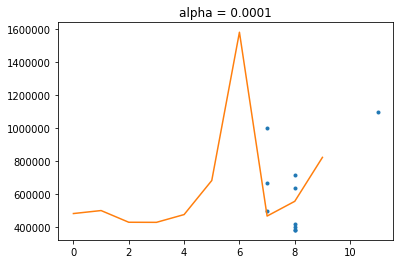

------------------


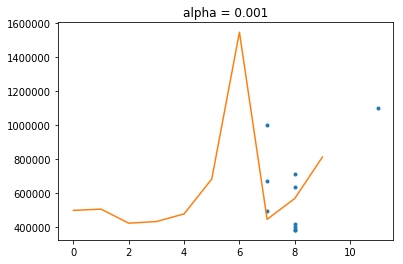

------------------


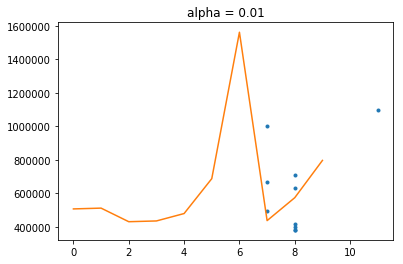

------------------


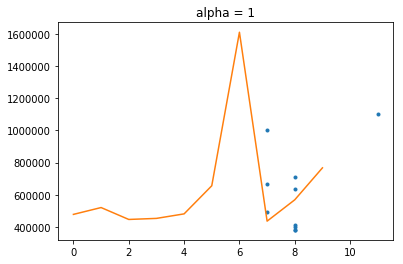

------------------


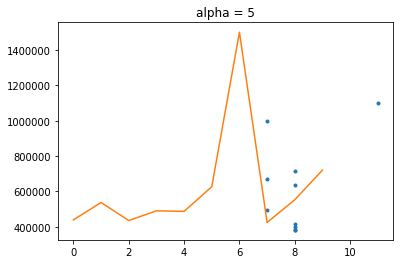

------------------


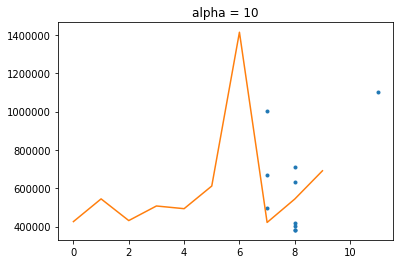

------------------


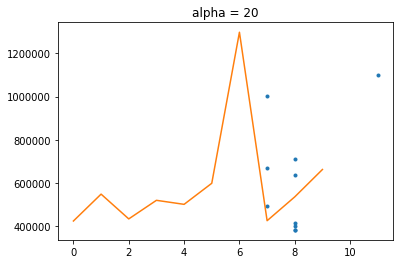

------------------


,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,11561.134969,2.632187e+10,5.713457e+07,4.544422e+10,1.310918e+08,2.734366e+11,3.152053e+09,2.628224e+06,1.816238e+09,1.334737e+07,...,7.324460e-04,6.994022e-01,-6.931919,-8936.266091,5.997581e-10,-4.744588e-07,1.698887e-04,-2.519611e-01,-2.722763e+01,-12272.952762
1,0.000000,1.022923e+08,-1.539659e+05,-3.045807e+08,-4.128539e+05,-1.022391e+10,-4.314463e+06,-1.845833e+04,-6.316599e+06,-8.430099e+04,...,1.367161e-04,-6.239162e-03,-0.286125,-67.934632,4.925966e-10,-2.625817e-07,-1.649533e-05,-3.474647e-04,-7.192692e-02,-396.240637
2,0.000000,-1.934777e+07,-1.988423e+04,-2.027918e+07,-4.970813e+04,-1.141535e+08,6.756938e+05,-2.840569e+03,3.843251e+05,-1.527415e+03,...,4.965919e-06,-4.153268e-04,-0.047137,-2.810565,3.663227e-10,-4.975867e-09,2.479718e-06,-1.690953e-04,-3.251952e-03,-7.087235
3,0.000000,3.742417e+03,-2.339687e+02,-2.339839e+05,-2.166243e+02,7.191220e+06,-6.040077e+04,-5.472889e+01,-2.703155e+04,-7.416582e+01,...,8.108047e-08,1.341955e-06,0.000016,0.033555,1.296170e-11,-8.434277e-10,2.989626e-08,7.144206e-07,5.148849e-05,-0.279934
4,0.000000,-5.681930e+04,-9.770089e+01,-7.706451e+04,-1.654006e+02,9.246301e+05,-2.281843e+04,-1.521163e+01,-1.146448e+04,-2.390487e+01,...,3.242314e-08,-4.535982e-07,0.000100,0.011519,3.516295e-12,1.274691e-11,8.784473e-09,3.946799e-07,7.232591e-06,-0.028847
5,0.000000,-2.036404e+04,-1.104973e+00,-1.634213e+04,-4.900828e+01,2.058429e+05,-2.332666e+03,-1.276318e+00,-1.708358e+03,8.848596e-01,...,4.542514e-09,-4.749468e-07,0.000034,0.000704,1.315903e-12,4.390926e-11,5.902178e-10,-6.797479e-08,-3.790592e-06,0.001525
6,0.000000,-3.571501e+03,4.368919e+00,2.853456e+03,-7.093378e-01,1.047656e+05,-4.004421e+02,4.356119e-01,8.352347e+00,4.932368e-02,...,-1.545789e-10,-4.350850e-08,0.000004,0.000760,1.168467e-13,3.458248e-12,-3.449557e-10,-2.744949e-08,-3.837045e-08,0.004041
7,0.000000,-7.257241e+02,3.602272e+00,3.201853e+03,1.225826e+00,6.335832e+04,-1.923345e+01,5.083257e-01,1.620691e+02,3.827828e-01,...,-3.095729e-11,3.801051e-08,0.000003,0.000726,-3.274309e-15,-1.021108e-12,-7.589186e-11,1.235670e-09,2.739237e-07,0.002470
8,0.000000,4.539588e+02,3.267674e+00,2.953792e+03,1.580151e+00,4.299647e+04,1.627126e+02,5.174608e-01,2.107938e+02,5.085833e-01,...,2.147988e-11,4.671554e-08,0.000003,0.000640,-1.559875e-14,-1.288553e-12,-1.903654e-11,5.827607e-09,3.294417e-07,0.001678
9,0.000000,1.189564e+03,2.810440e+00,2.489096e+03,1.620249e+00,2.651746e+04,2.805497e+02,4.924281e-01,2.253878e+02,5.702108e-01,...,1.254935e-10,4.812150e-08,0.000003,0.000522,-1.515120e-14,-9.362219e-13,2.587971e-11,7.692261e-09,3.282863e-07,0.001036


In [30]:
for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(poly_features, Y_train)
    coeff_matrix.append(ridge.coef_)
    plot(X_train[:10 , 2], Y_train[:10], ridge.predict(poly_features)[:10], alpha=alpha)
    m_scores.append(ridge.score(getPolynomial(X_test, 5) , Y_test))
    print('------------------')
pd.DataFrame(coeff_matrix)

In [31]:
m_scores

[0.6781805503976259,
 0.6527832474819593,
 0.628567293650991,
 0.6795907075854198,
 0.6786550557088219,
 0.6774565234355938,
 0.675186235795771,
 0.6559949197806147,
 0.6345930046646877,
 0.6022997019284158]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


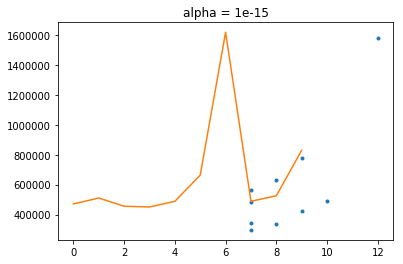

------------------


In [ ]:
m_scores2 = []
for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = alpha, normalize=True, max_iter=1e5)
    lasso.fit(poly_features, Y_train)
    coeff_matrix.append(lasso.coef_)
    plot(X_test[:10 , 2], Y_test[:10], lasso.predict(poly_features)[:10], alpha=alpha)
    m_scores2.append(lasso.score(getPolynomial(X_test, 5) , Y_test))
    print('------------------')
pd.DataFrame(coeff_matrix)

# Logistic Regression

In [43]:
mobile_prices_train = pd.read_csv('Mobile Prices/train.csv')

In [46]:
mobile_prices_train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [57]:
training_data_mobile = mobile_prices_train.iloc[:, [0,13,11]].values
goal_data_mobile = mobile_prices_train.iloc[:, -1].values

from sklearn.cross_validation import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(training_data_mobile, goal_data_mobile, test_size=0.2, random_state = 0)

In [58]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train_1, Y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_1, logistic.predict(X_test_1))
pd.DataFrame(cm)

,0,1,2,3
0,95,0,0,0
1,8,65,19,0
2,0,19,50,30
3,0,0,0,114


In [62]:
logistic.score(X_test_1, Y_test_1)

0.81